In [1]:
import pandas as pd
from utils.prepare_data import prepare_data

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

In [2]:
df = pd.read_csv('datasets/aiops_kpi/train.csv')
df_prepared = prepare_data(df)

/home/geraaaxx/projects/ci_anomaly_detection/utils/prepare_data.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['datetime'] = pd.to_datetime(df_tmp['timestamp'], unit='s')
/home/geraaaxx/projects/ci_anomaly_detection/utils/prepare_data.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['datetime'] = pd.to_datetime(df_tmp['timestamp'], unit='s')
/home/geraaaxx/projects/ci_anomaly_detection/utils/prepare_data.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [3]:
df_prepared

,datetime,value,KPI ID,label
0,2017-04-30 16:00:00,1.901639,02e99bd4f6cfb33f,0
1,2017-04-30 16:01:00,1.786885,02e99bd4f6cfb33f,0
2,2017-04-30 16:02:00,2.000000,02e99bd4f6cfb33f,0
3,2017-04-30 16:03:00,1.885246,02e99bd4f6cfb33f,0
4,2017-04-30 16:04:00,1.819672,02e99bd4f6cfb33f,0
...,...,...,...,...
65466,2017-06-08 04:15:00,0.161922,88cf3a776ba00e7c,1
65467,2017-06-08 04:16:00,0.162297,88cf3a776ba00e7c,1
65468,2017-06-08 04:17:00,0.160597,88cf3a776ba00e7c,1
65469,2017-06-08 04:18:00,0.160393,88cf3a776ba00e7c,1


In [10]:
def plot_ts_for_kpi(df, kpi_id: str) -> None:
    plt.figure(figsize=(25,7))
    ax = sns.lineplot(data=df[df['KPI ID'] == kpi_id], x='datetime', y='value')
    
    cond1 = df['KPI ID'] == kpi_id 
    cond_label = df['label'] == 1
    df_anomaly = df[cond1&cond_label]
    plt.scatter(df_anomaly['datetime'], df_anomaly['value'], color='red', label='Anomalies',s=10)
    
    plt.title(f"Time series for {kpi_id}")
    ax.set_xlabel(xlabel='Date')
    ax.set_ylabel(ylabel='Value')
    plt.show()

In [11]:
df_prepared

,datetime,value,KPI ID,label
0,2017-04-30 16:00:00,1.901639,02e99bd4f6cfb33f,0
1,2017-04-30 16:01:00,1.786885,02e99bd4f6cfb33f,0
2,2017-04-30 16:02:00,2.000000,02e99bd4f6cfb33f,0
3,2017-04-30 16:03:00,1.885246,02e99bd4f6cfb33f,0
4,2017-04-30 16:04:00,1.819672,02e99bd4f6cfb33f,0
...,...,...,...,...
65466,2017-06-08 04:15:00,0.161922,88cf3a776ba00e7c,1
65467,2017-06-08 04:16:00,0.162297,88cf3a776ba00e7c,1
65468,2017-06-08 04:17:00,0.160597,88cf3a776ba00e7c,1
65469,2017-06-08 04:18:00,0.160393,88cf3a776ba00e7c,1


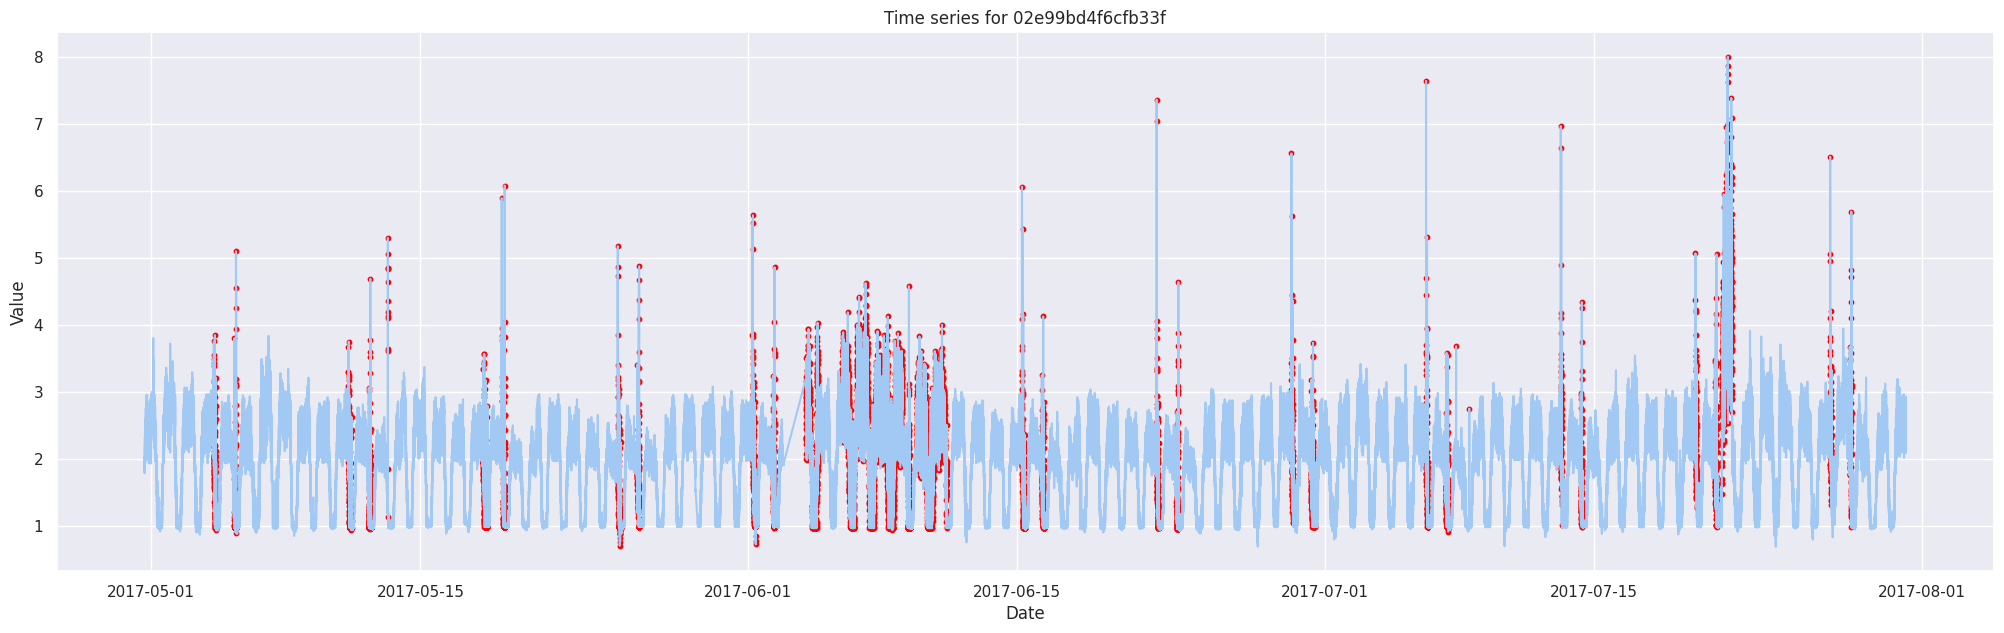

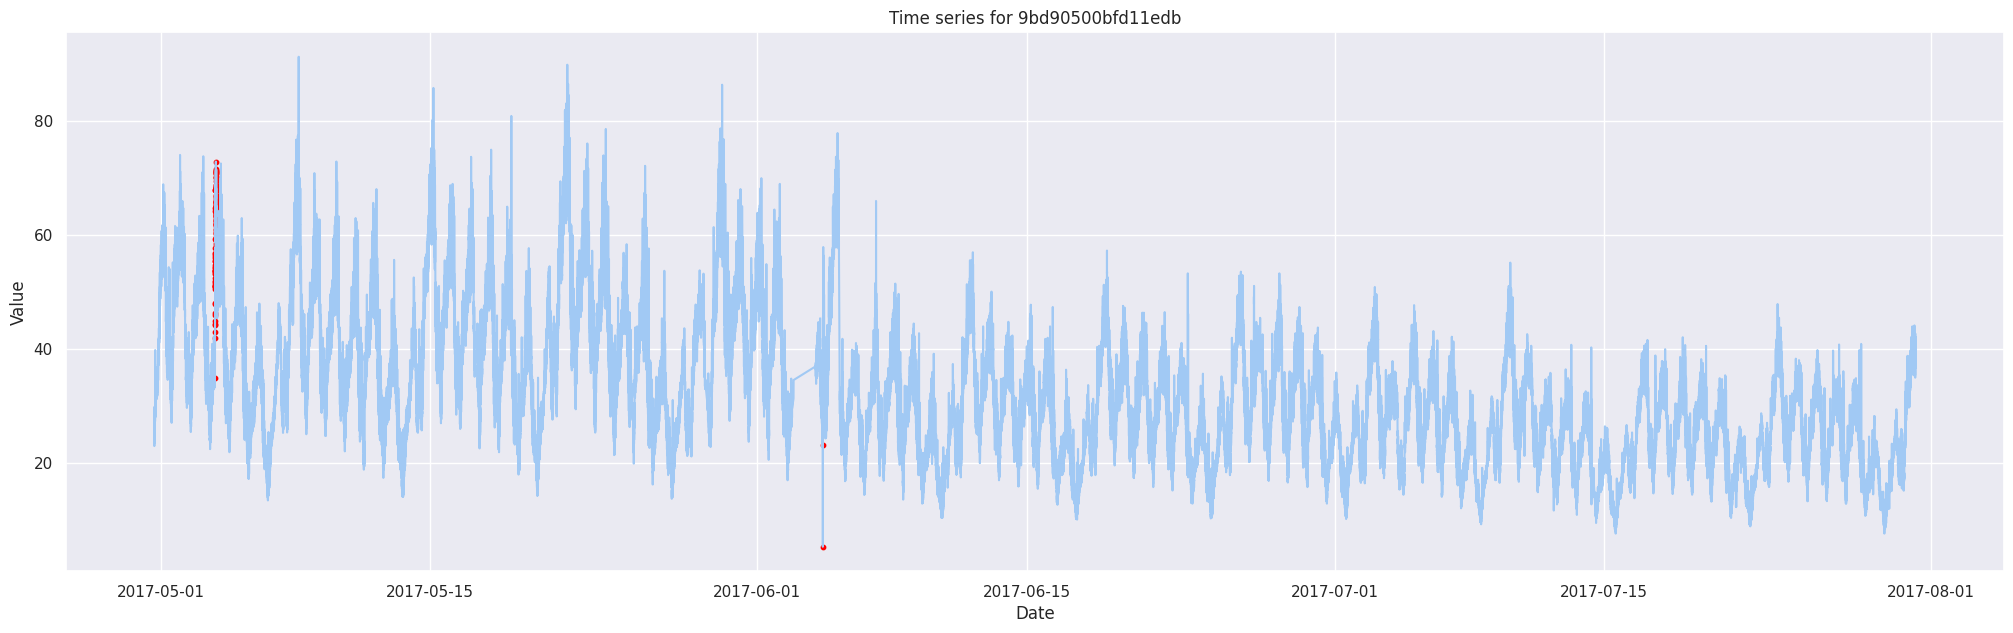

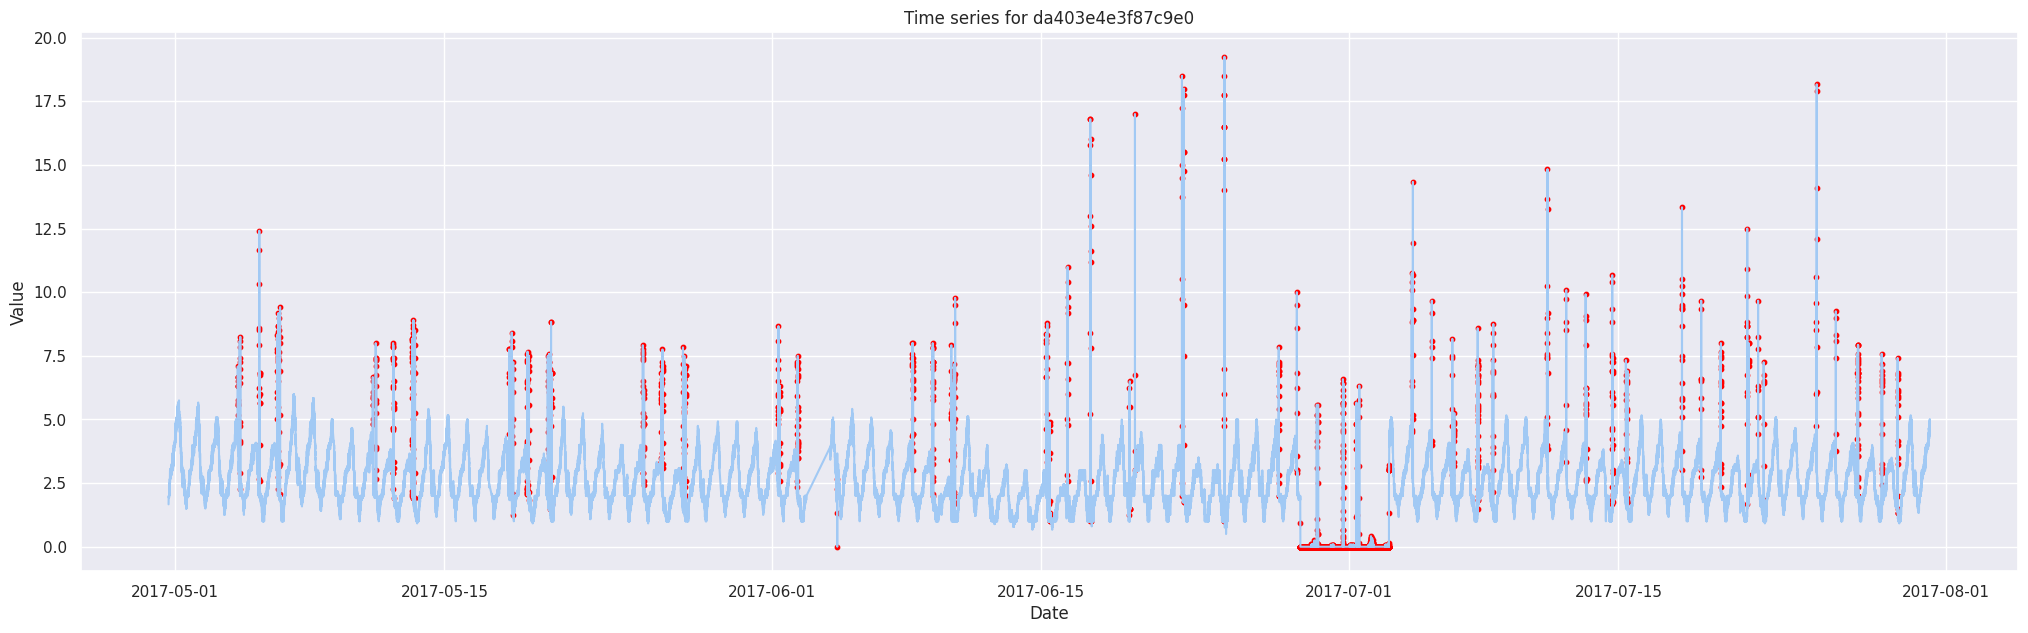

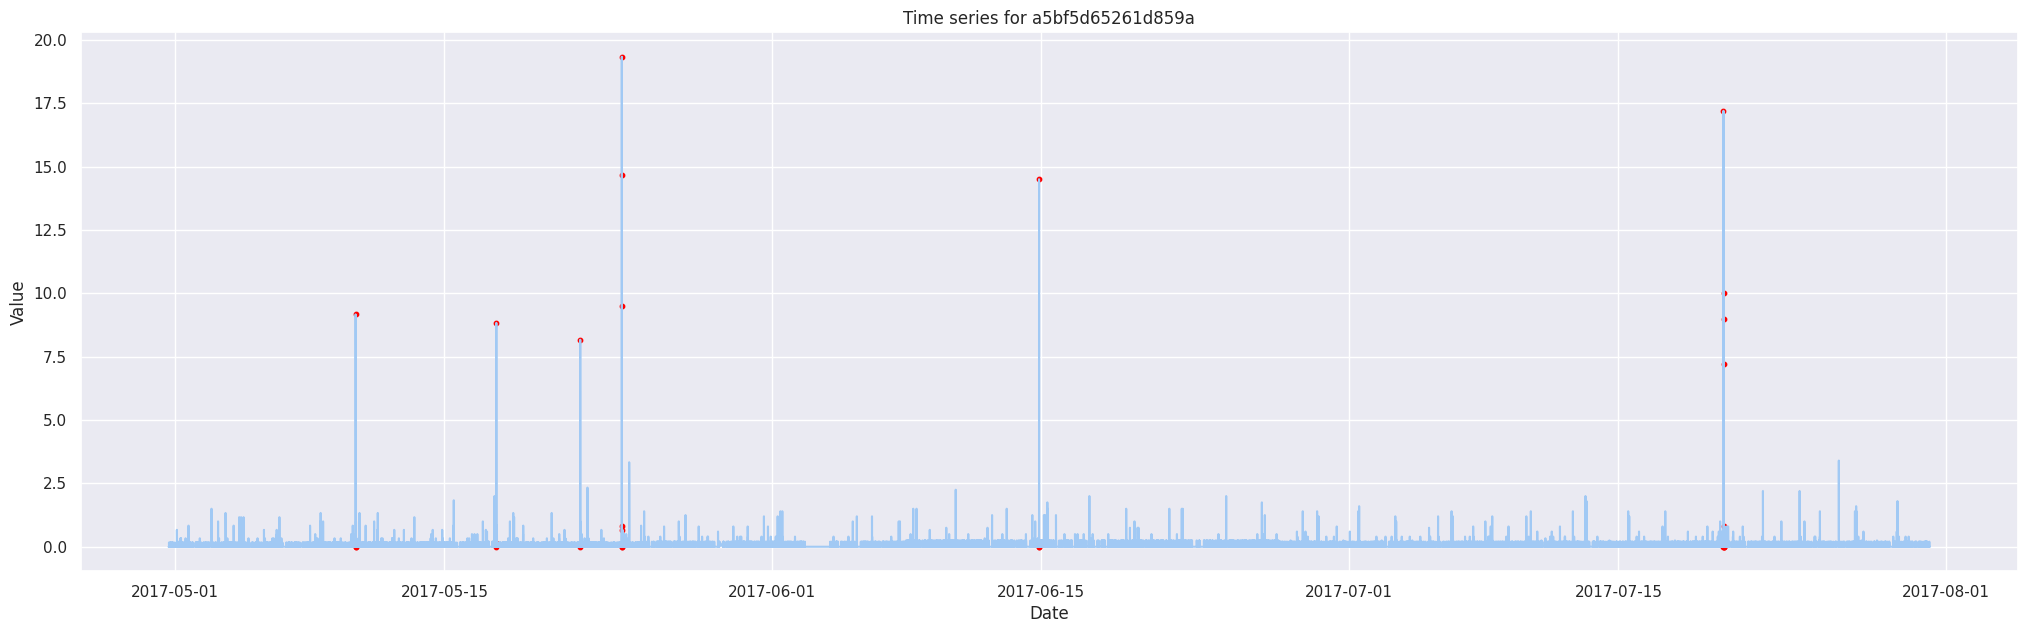

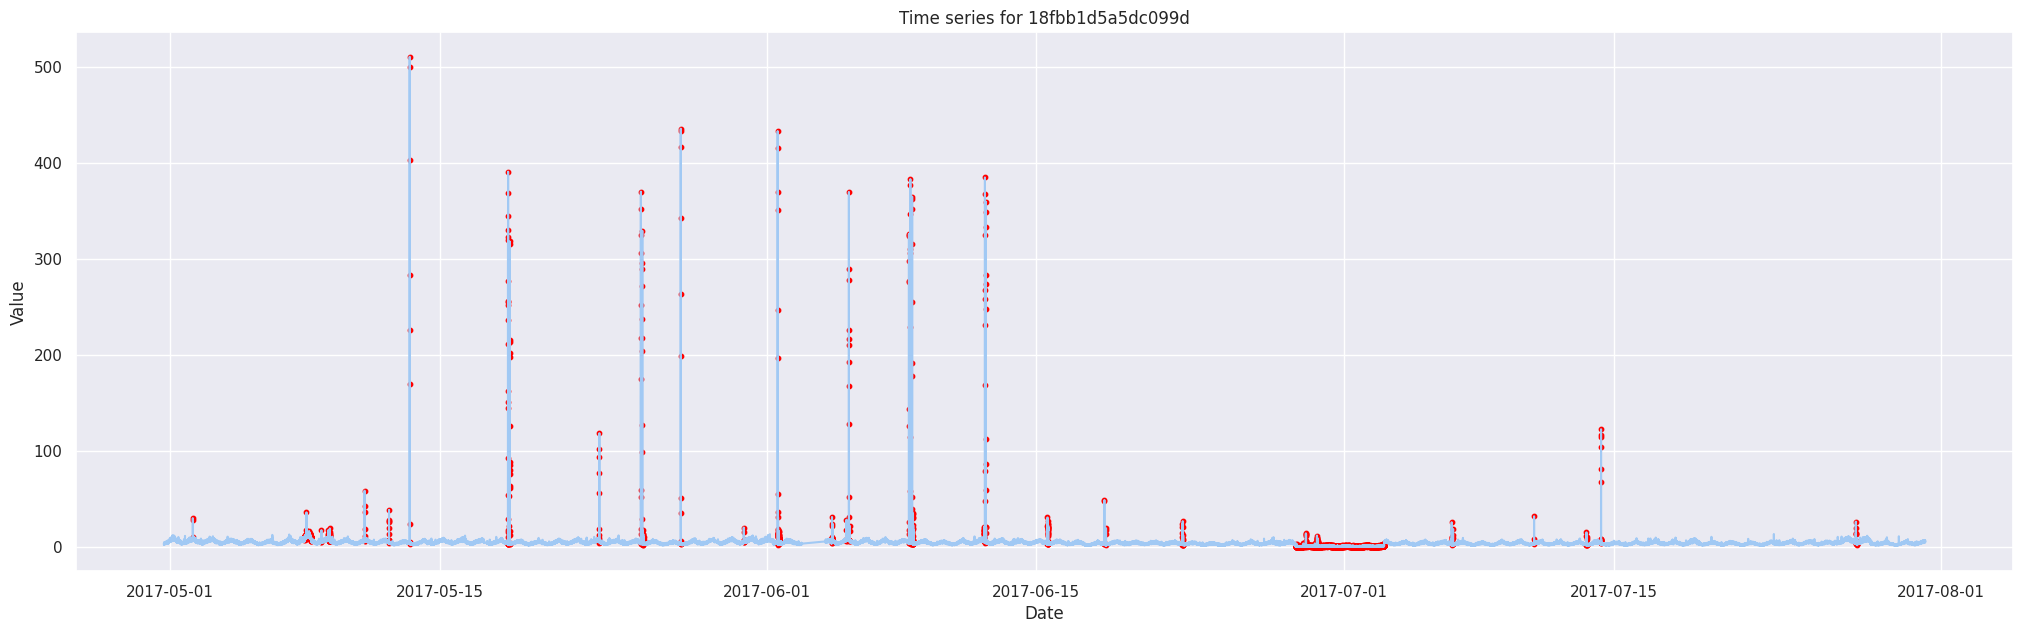

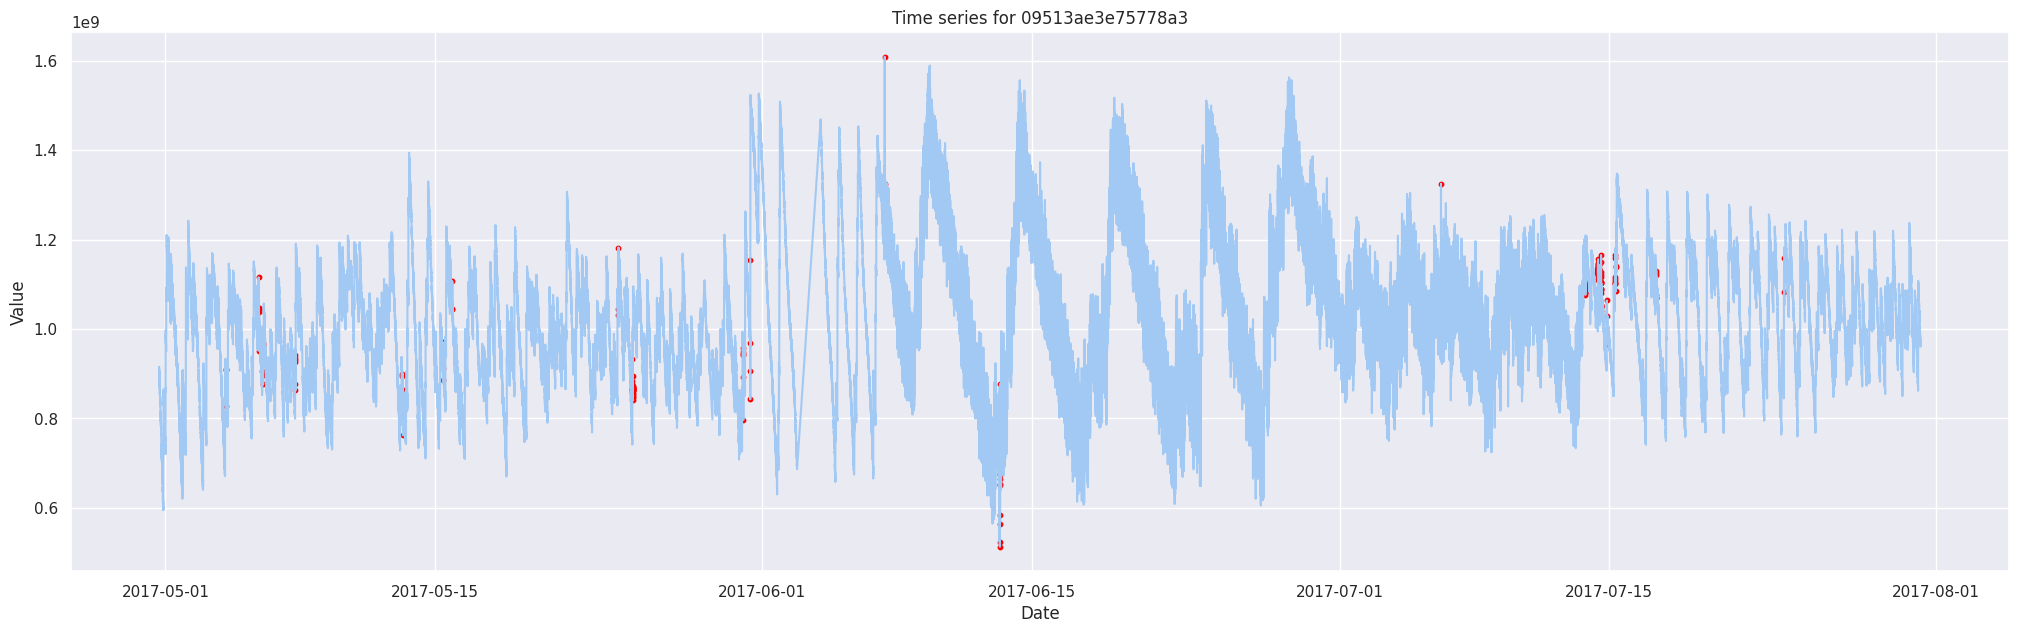

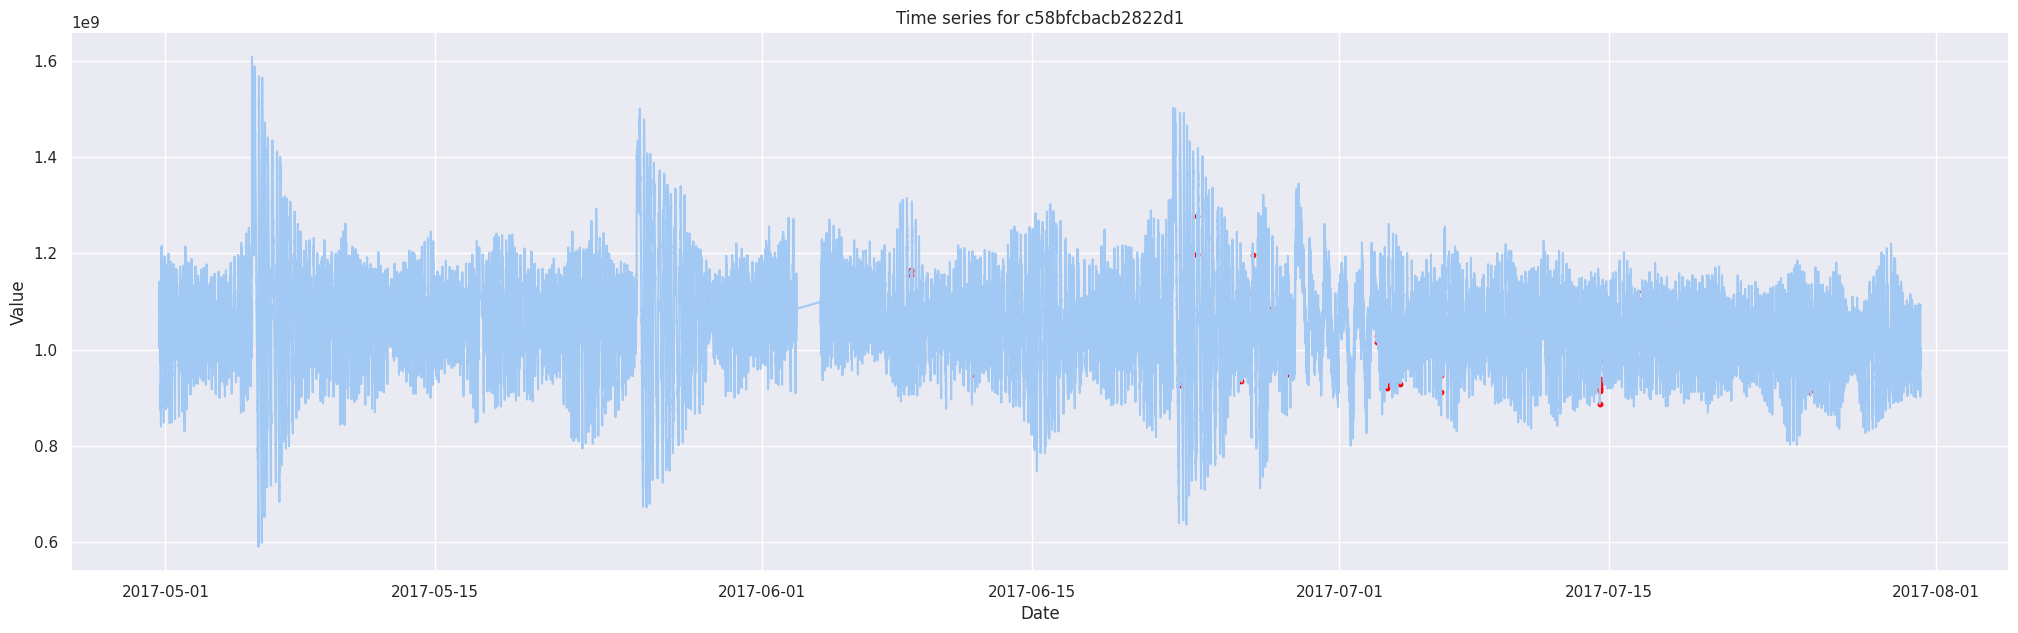

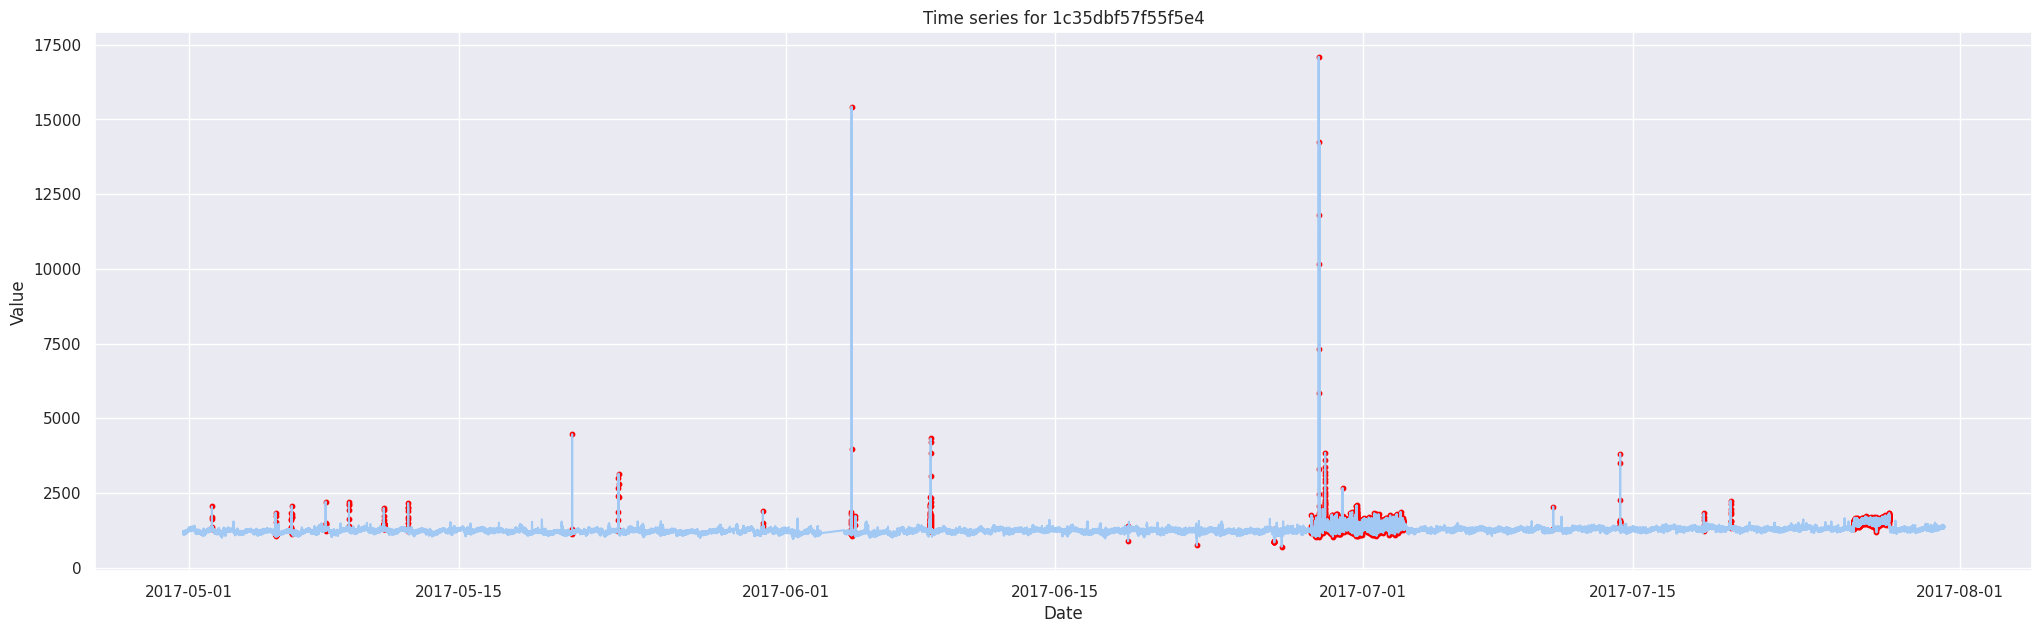

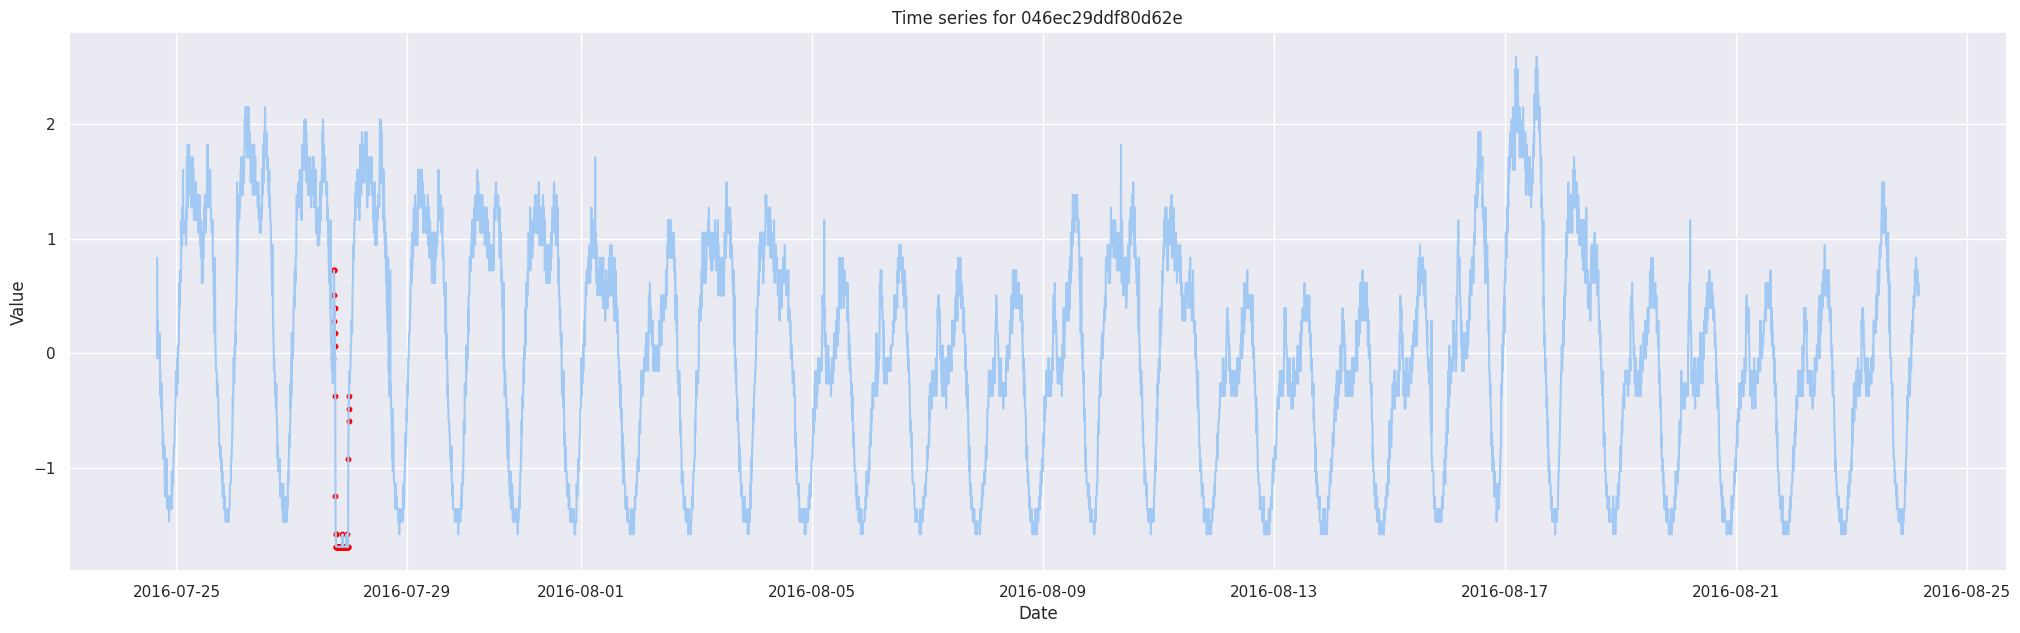

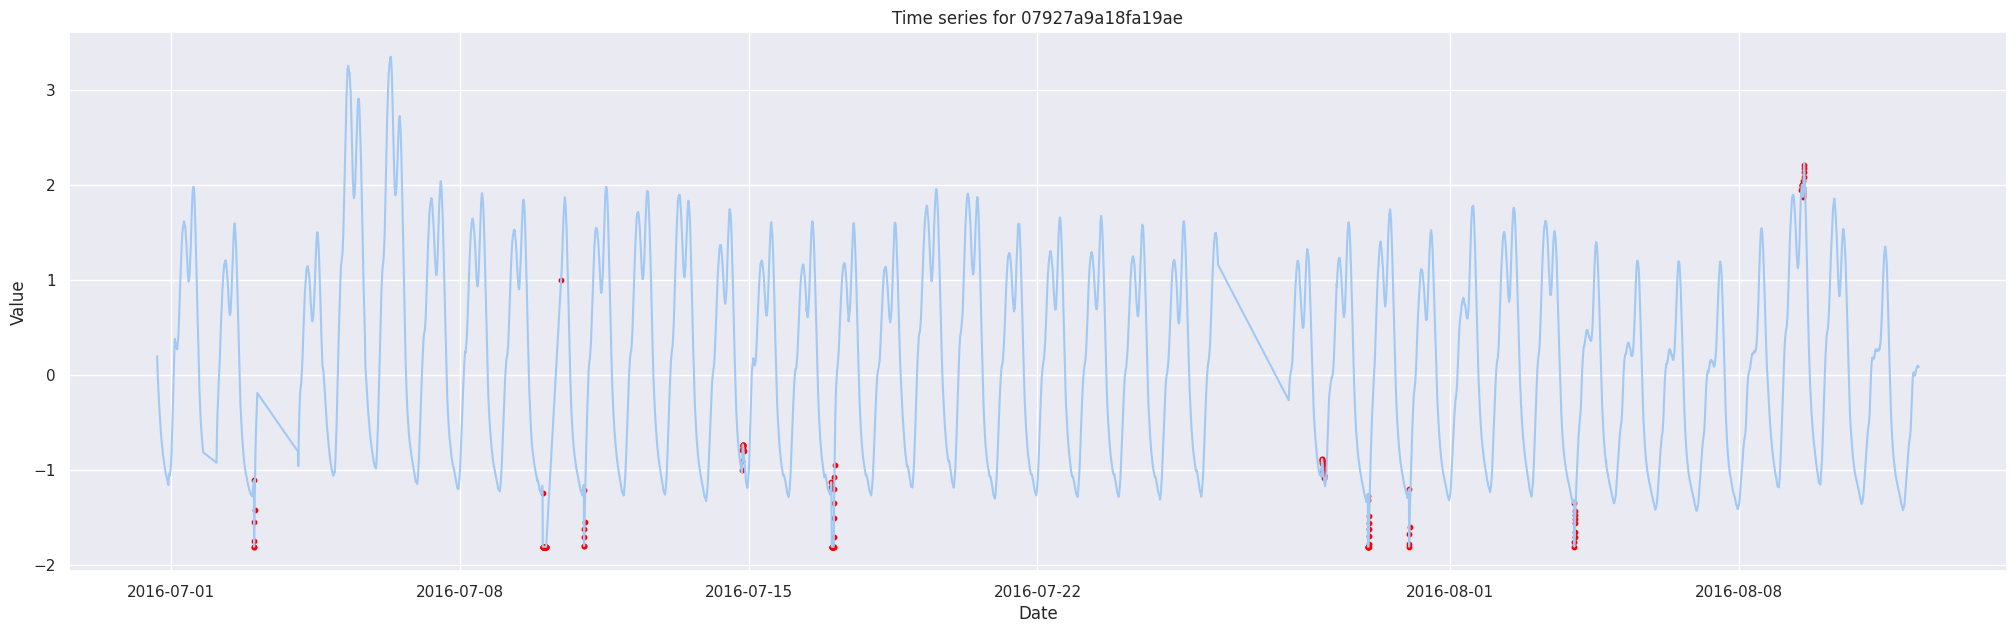

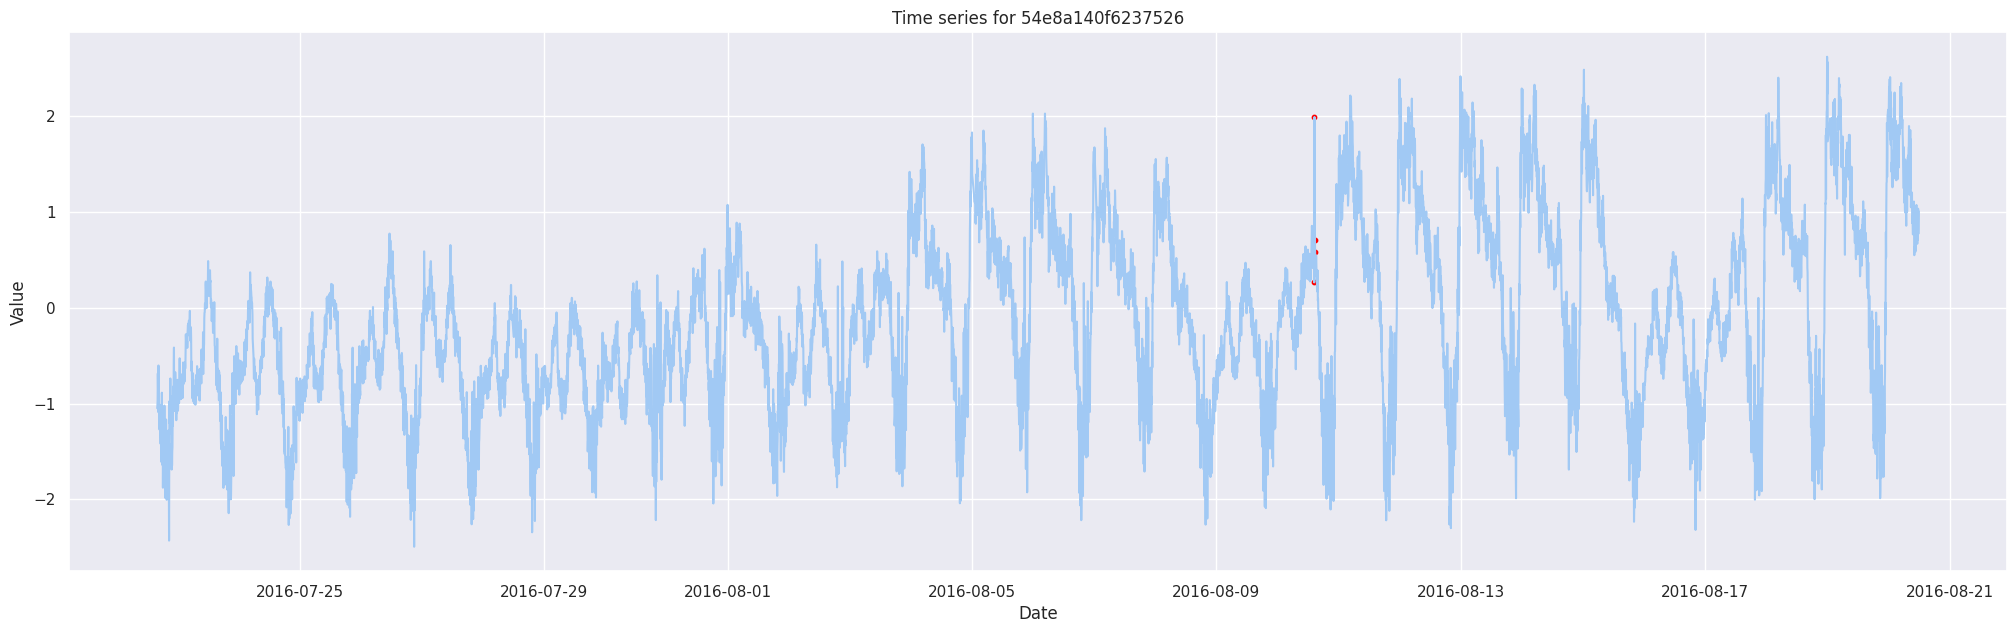

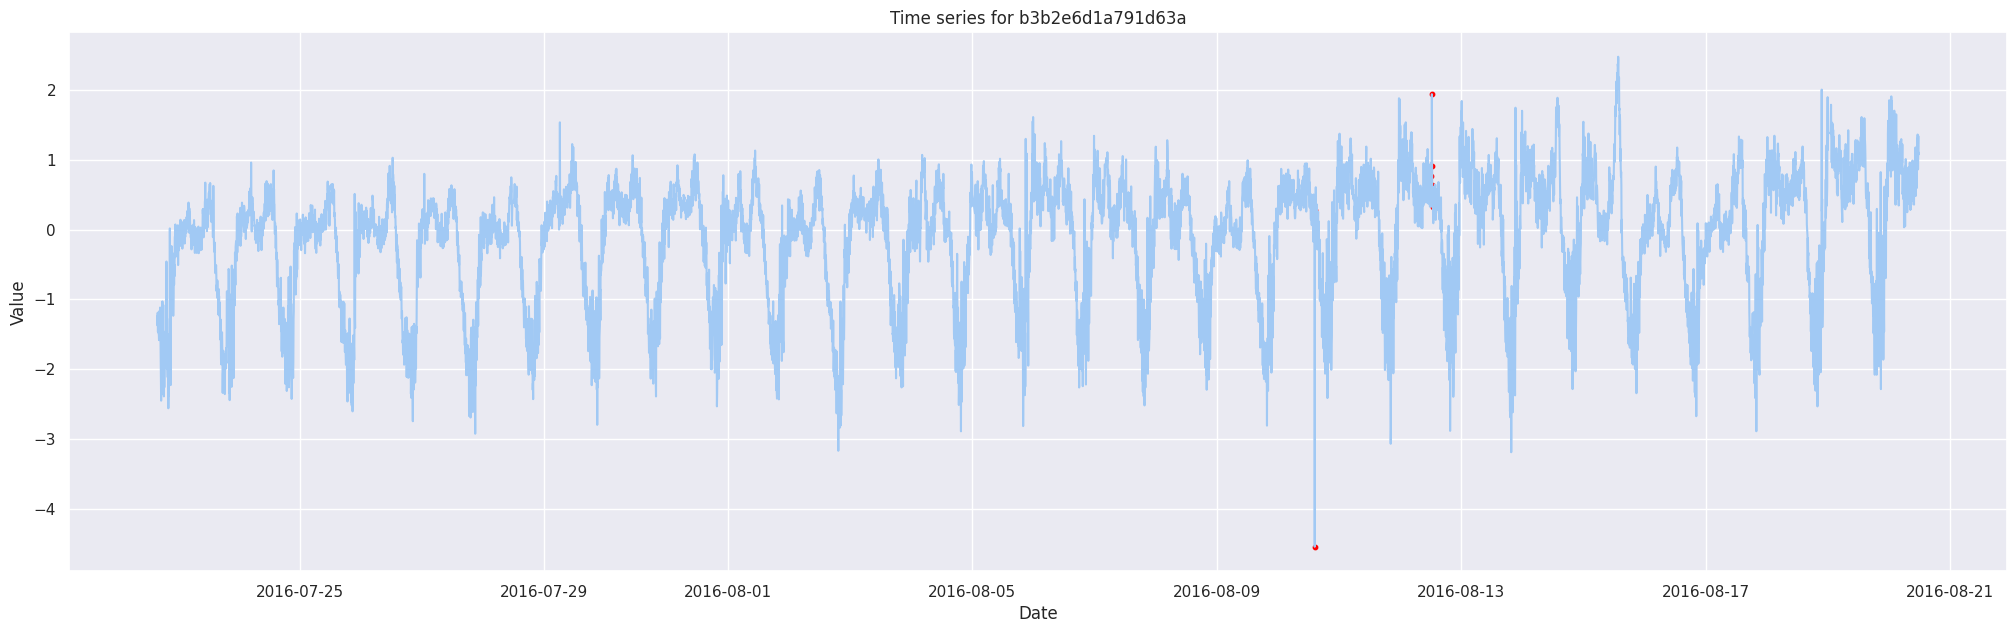

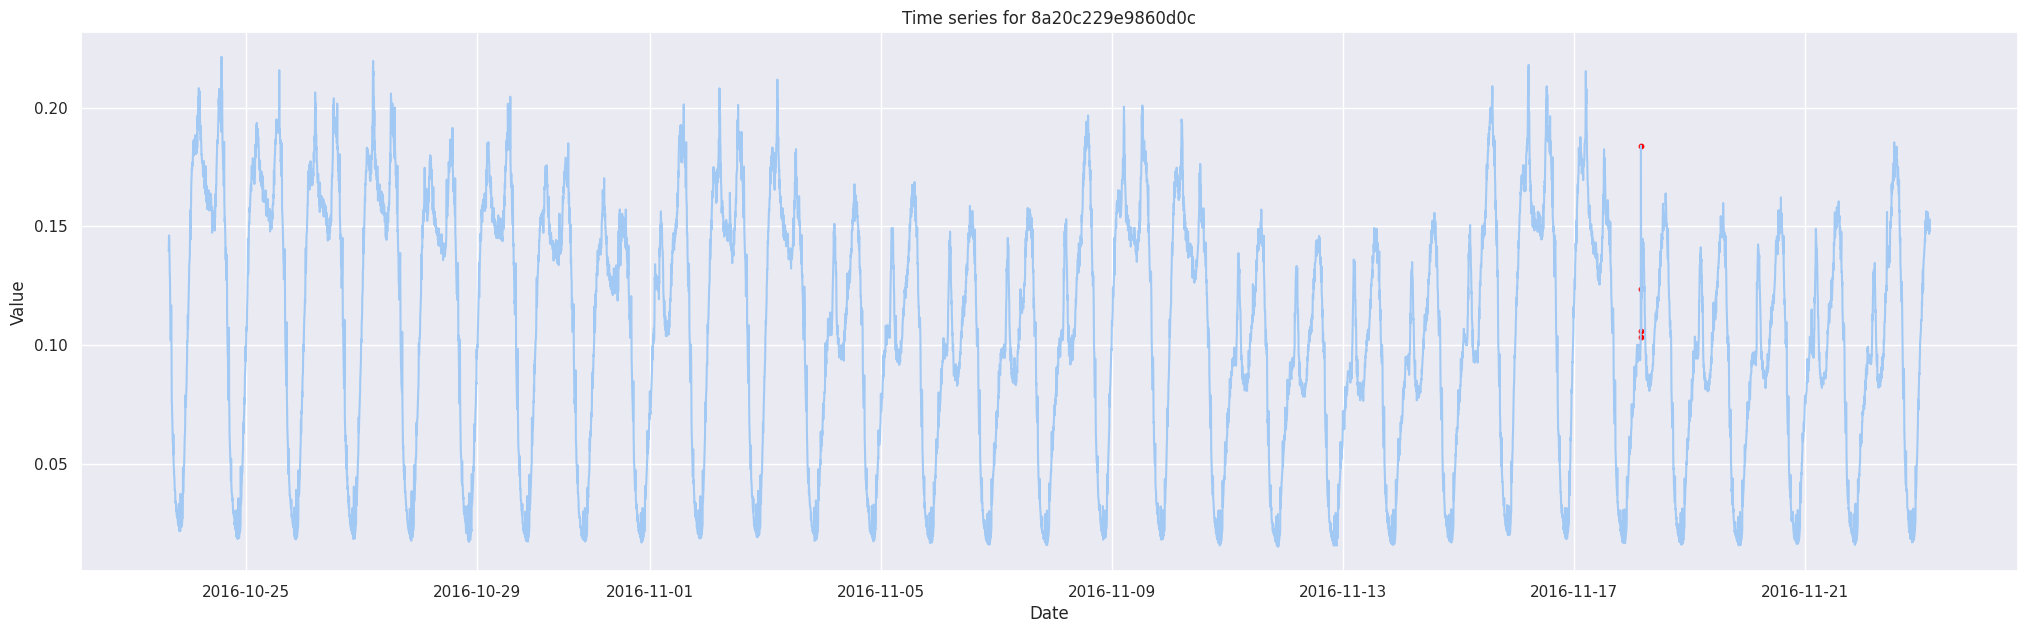

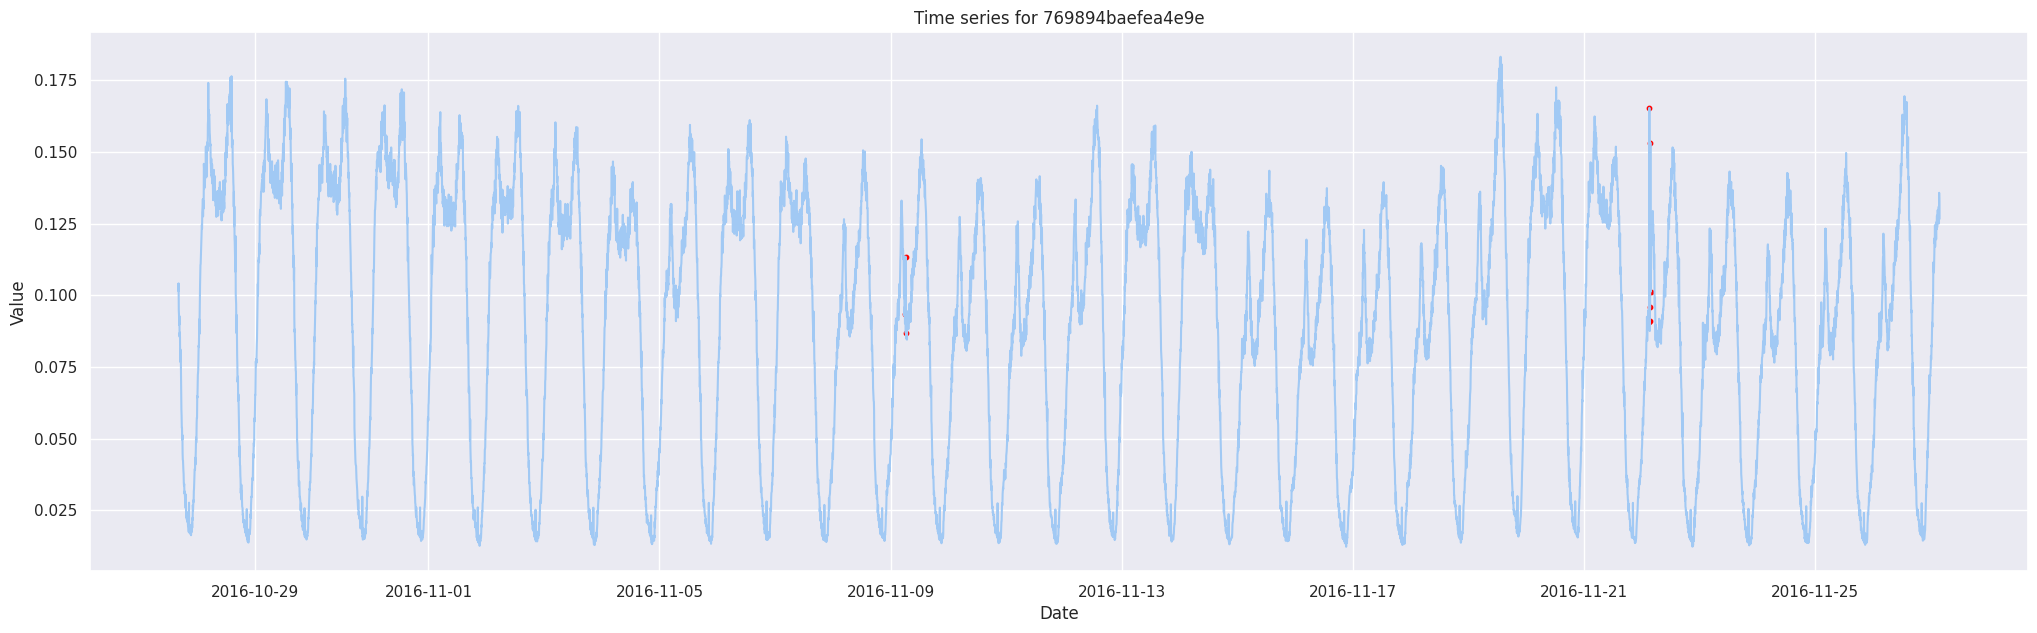

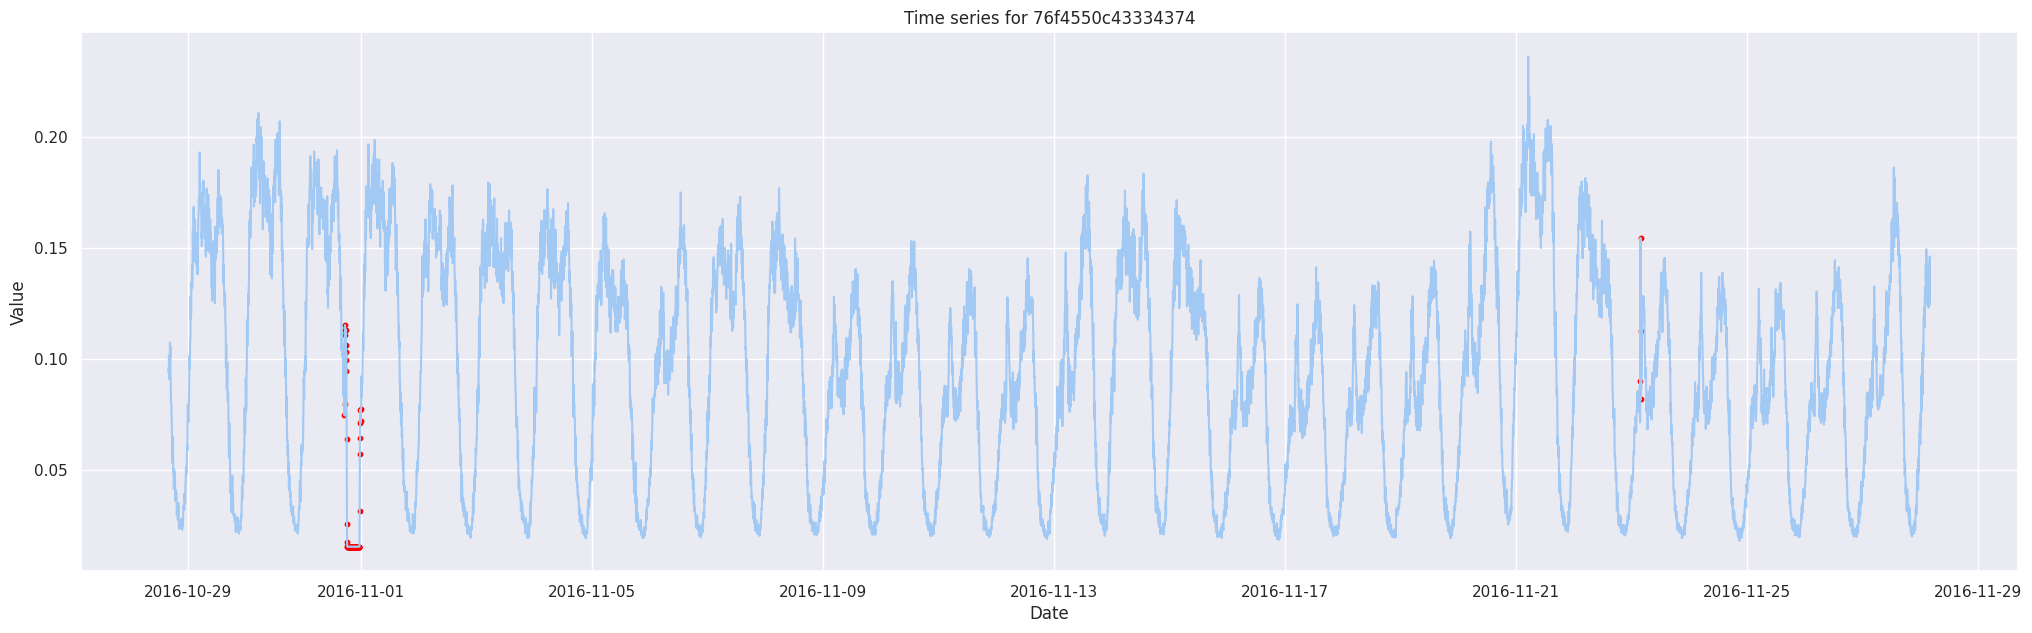

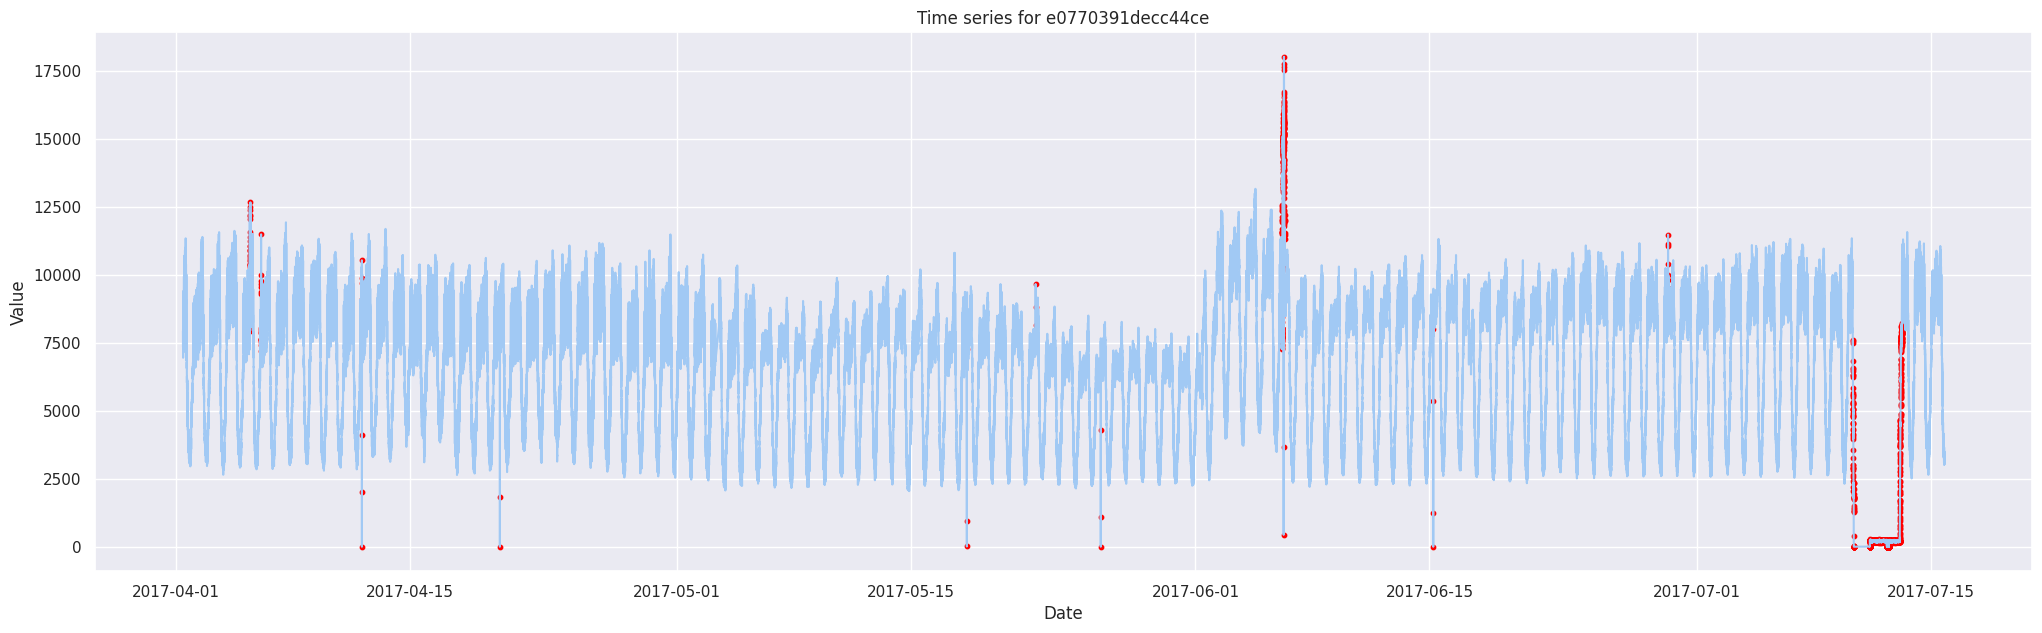

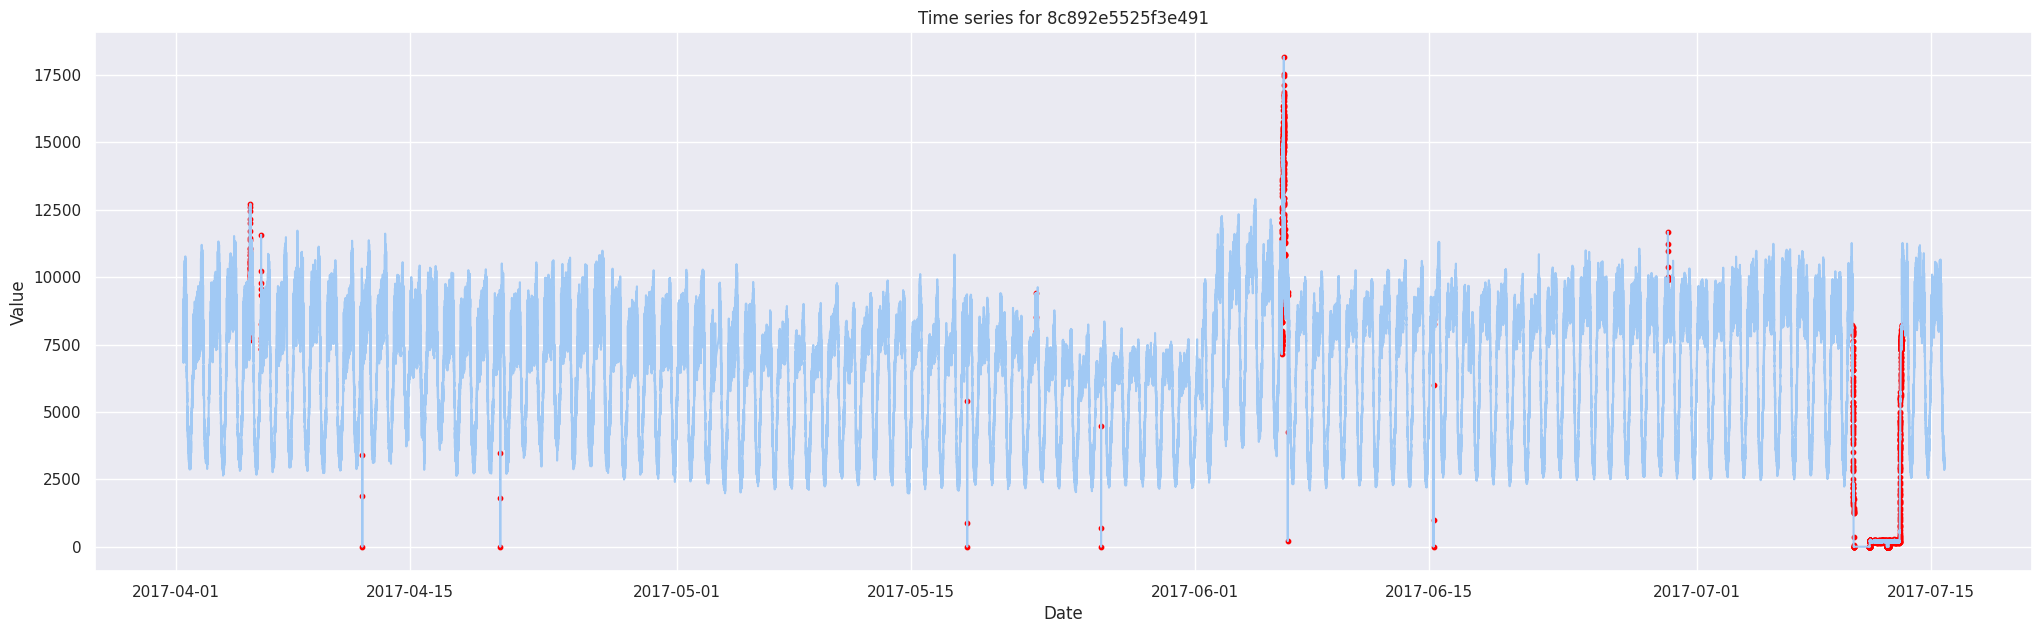

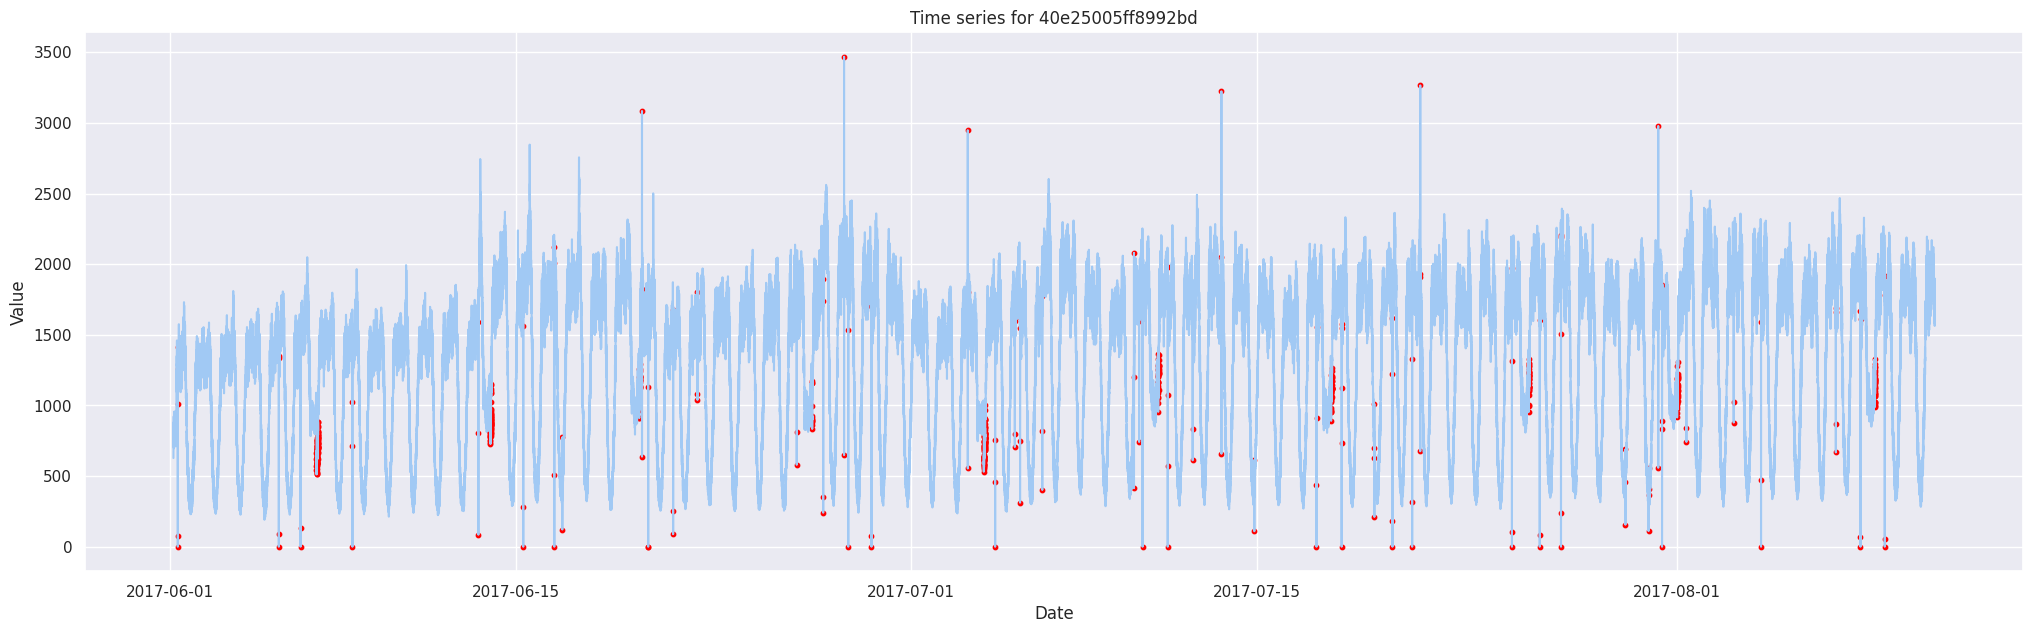

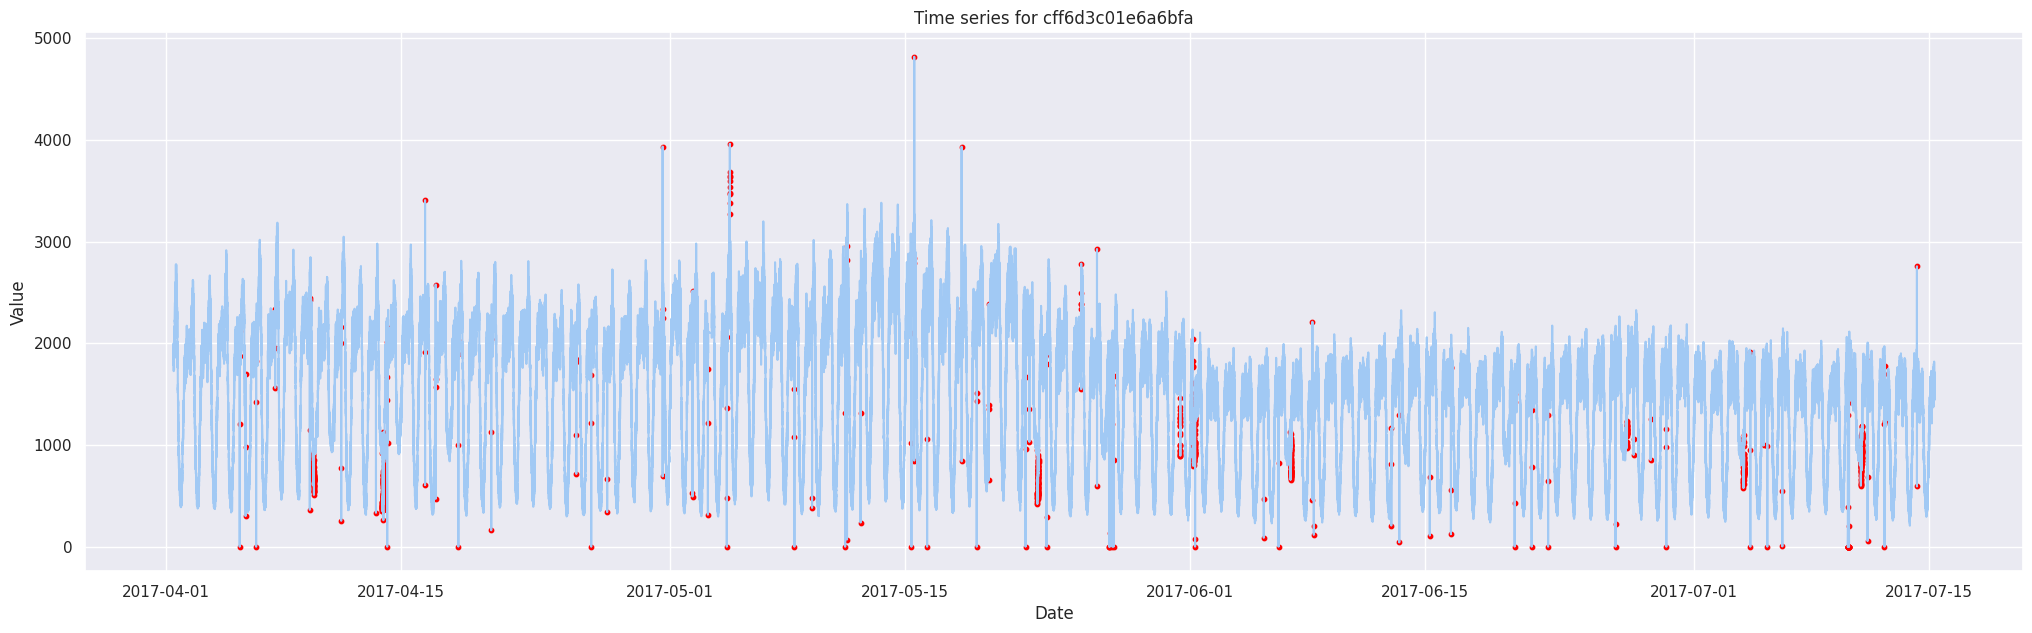

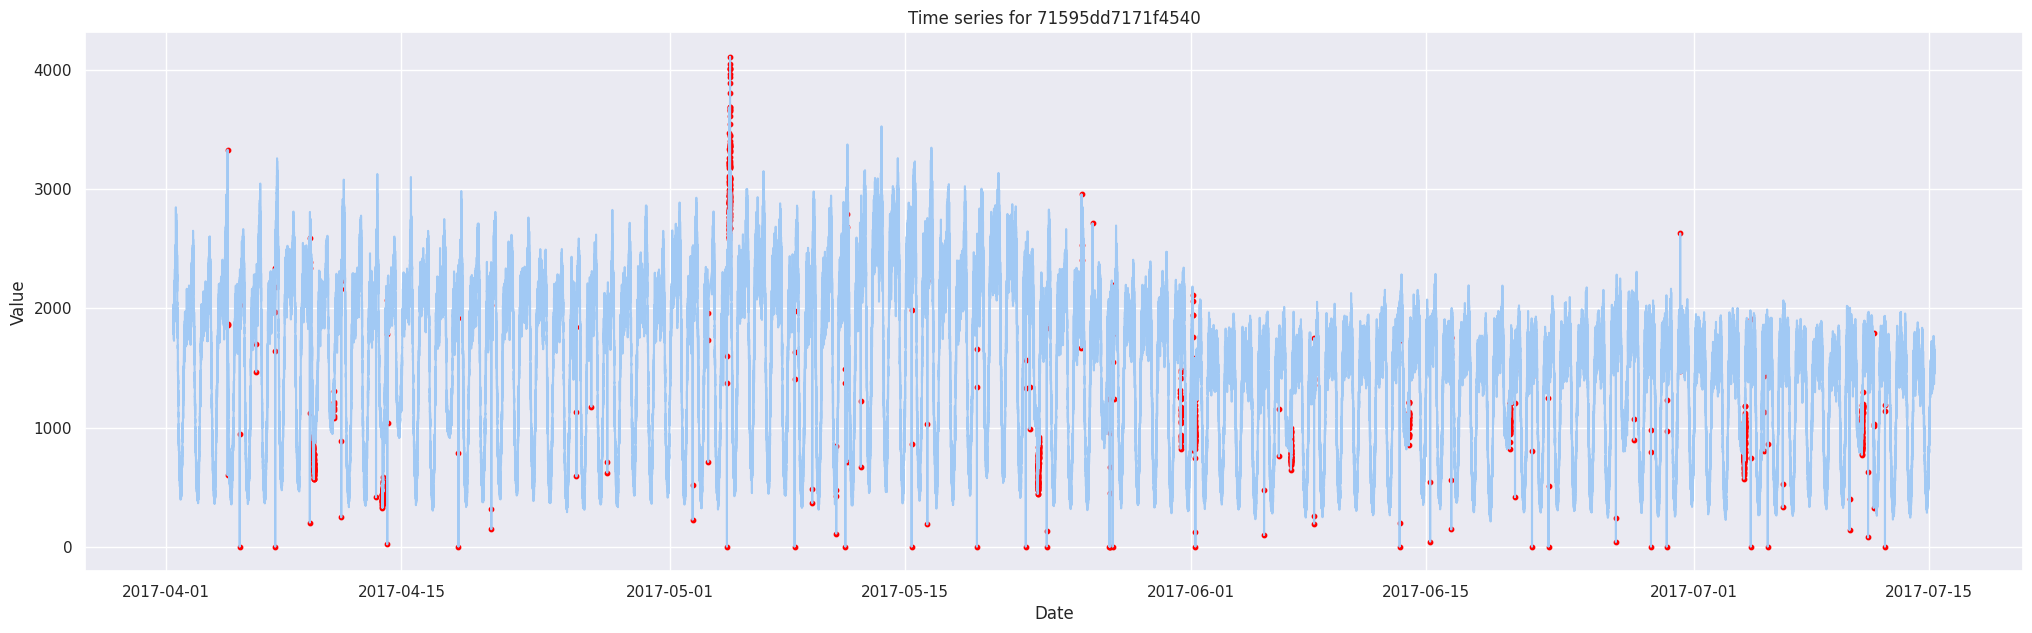

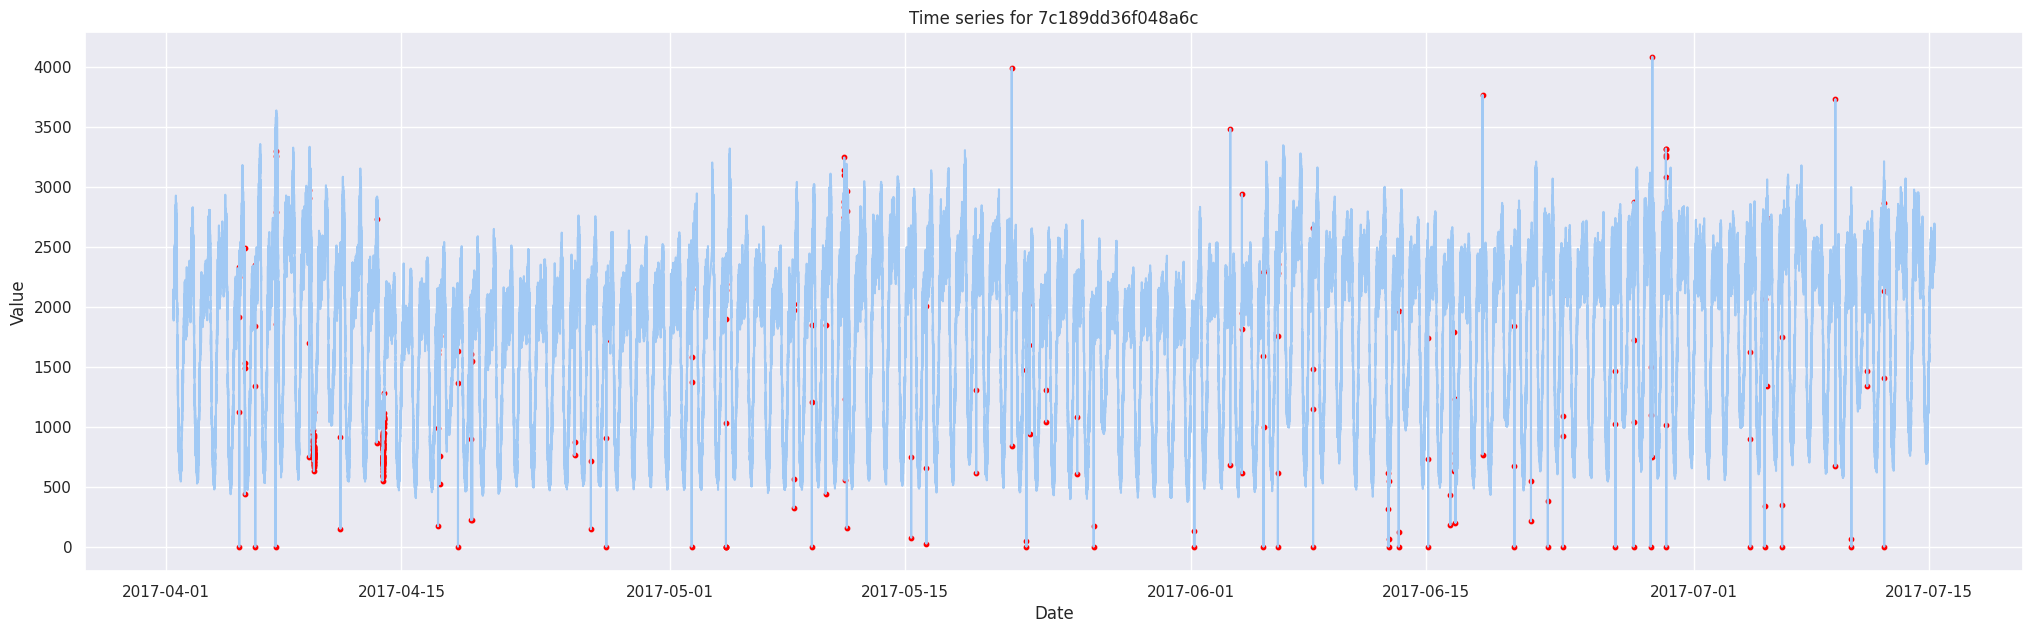

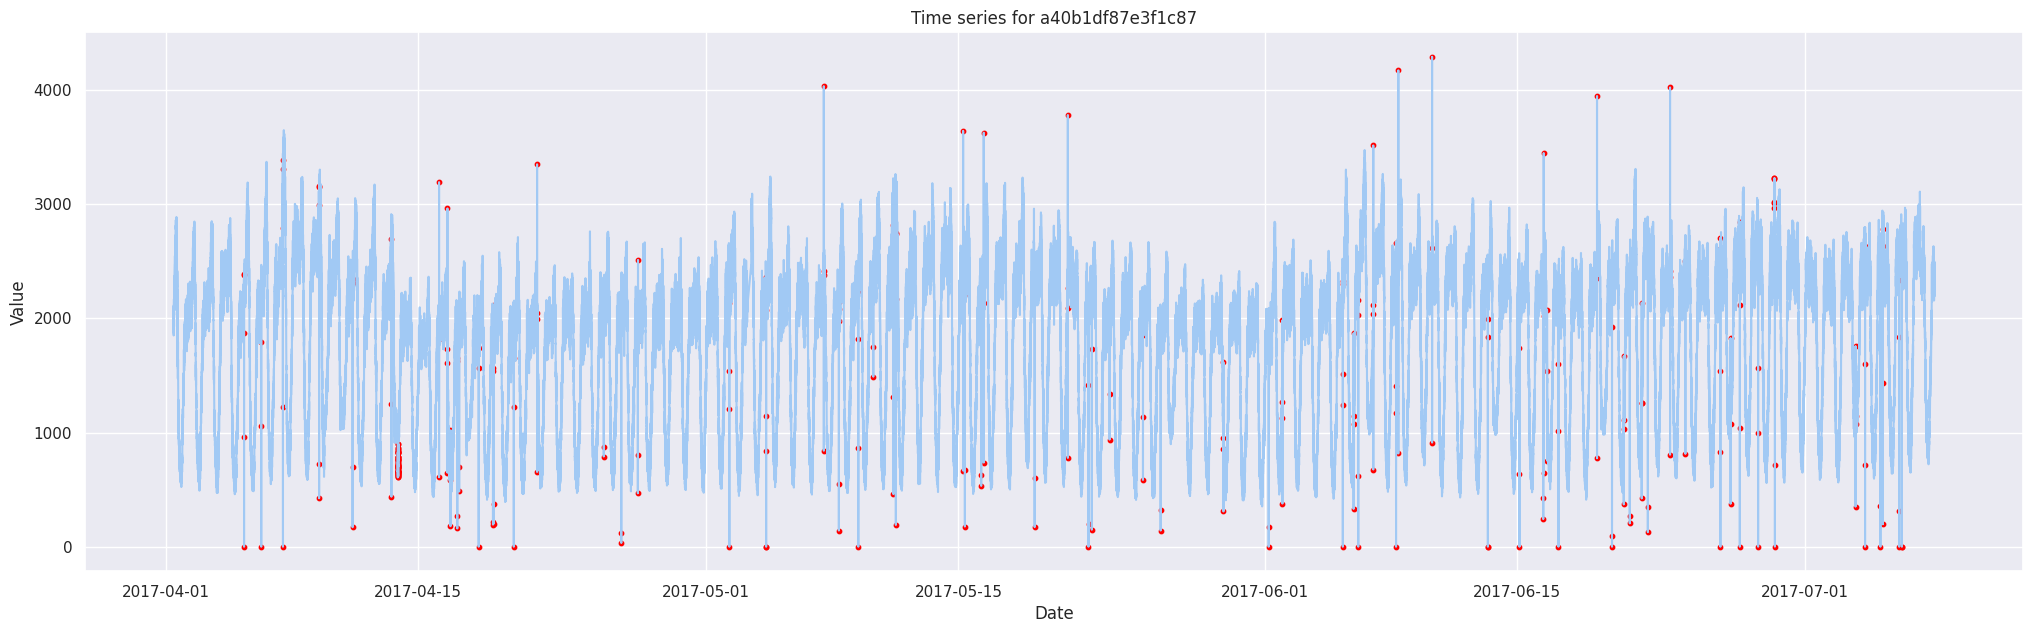

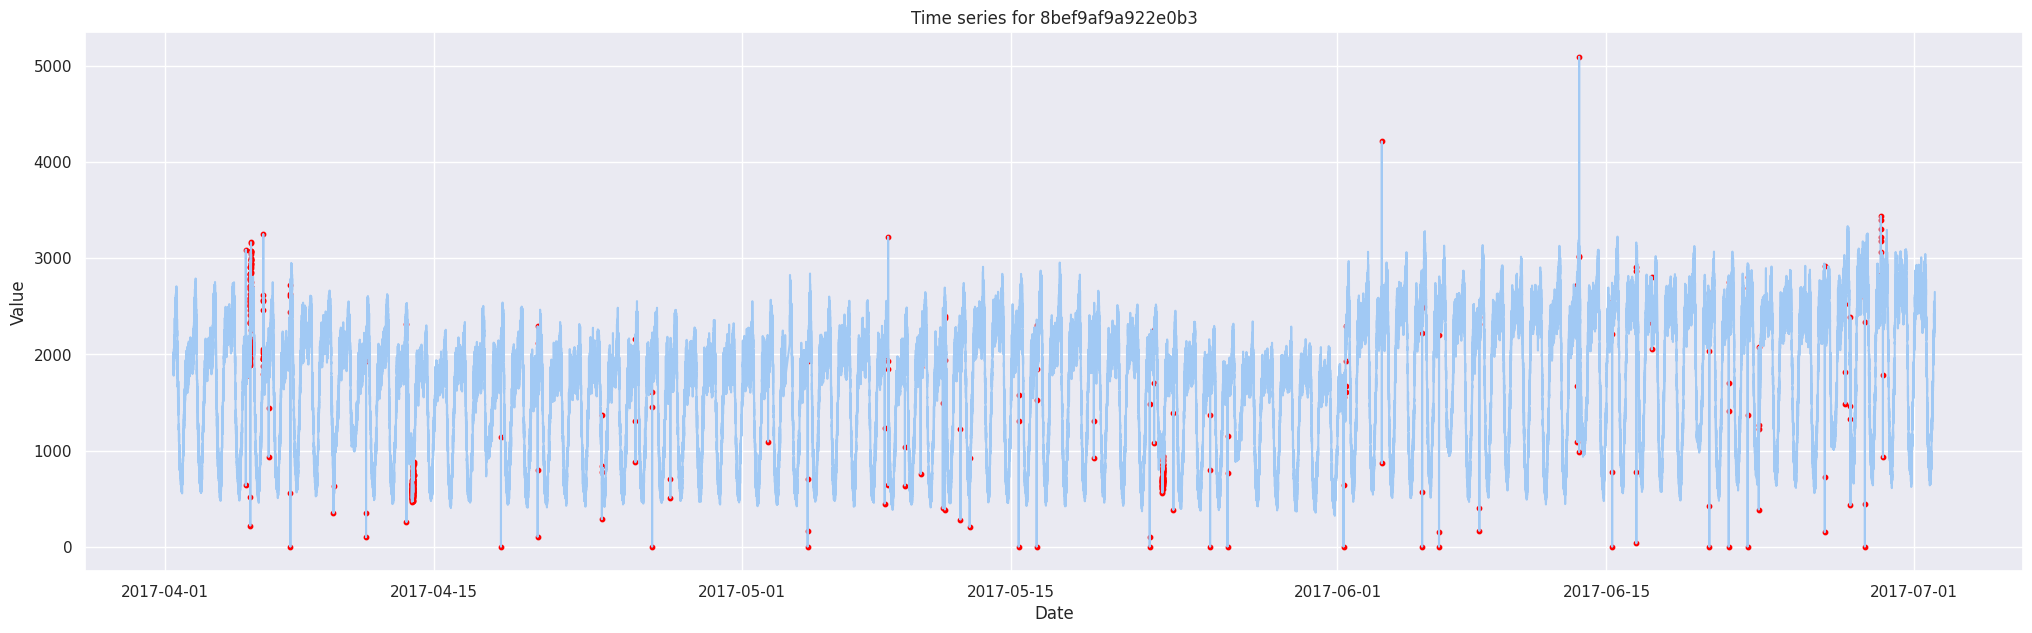

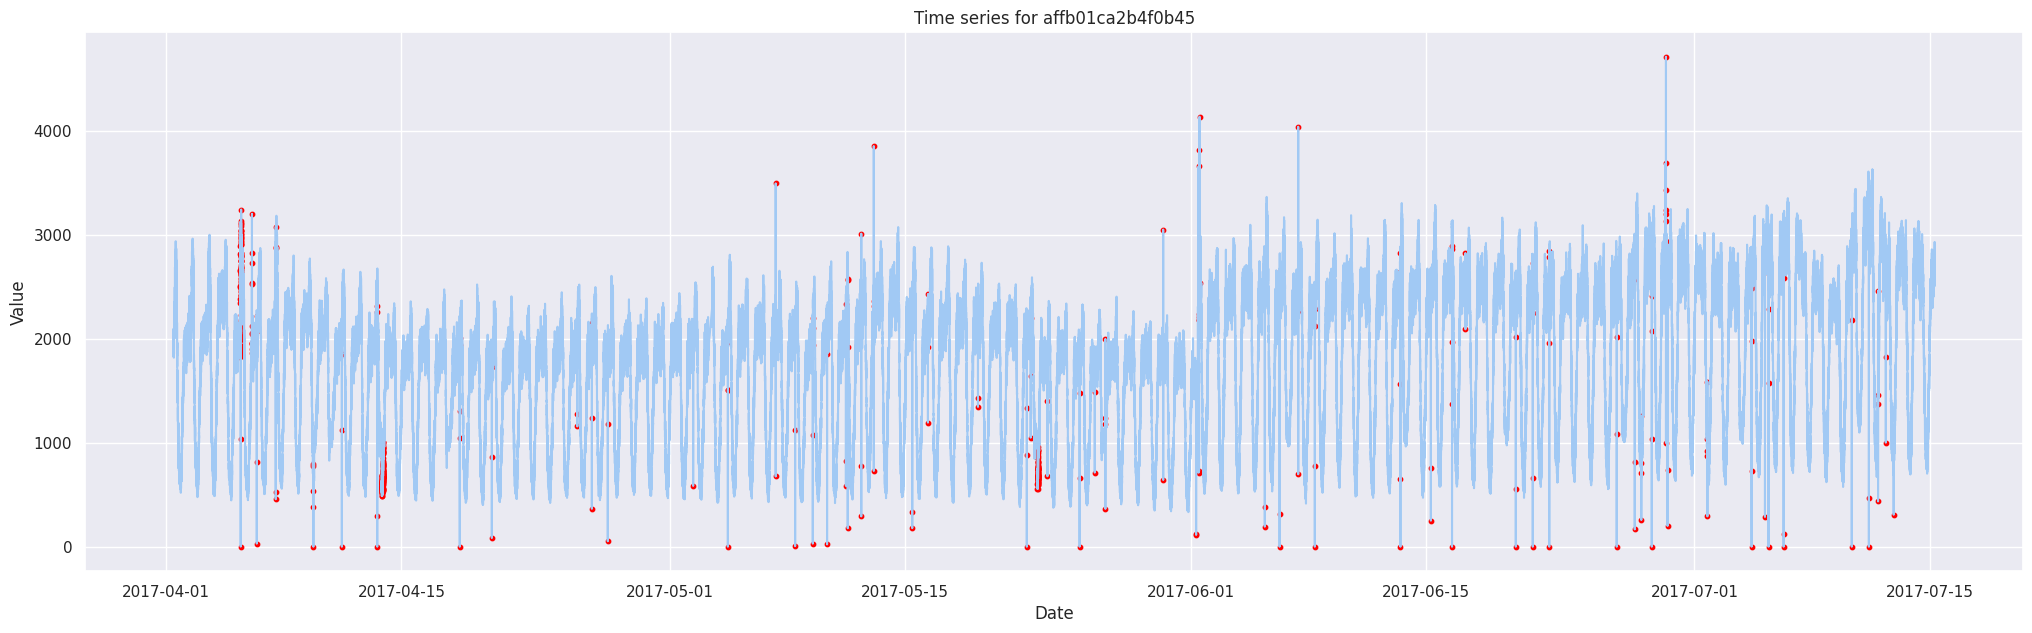

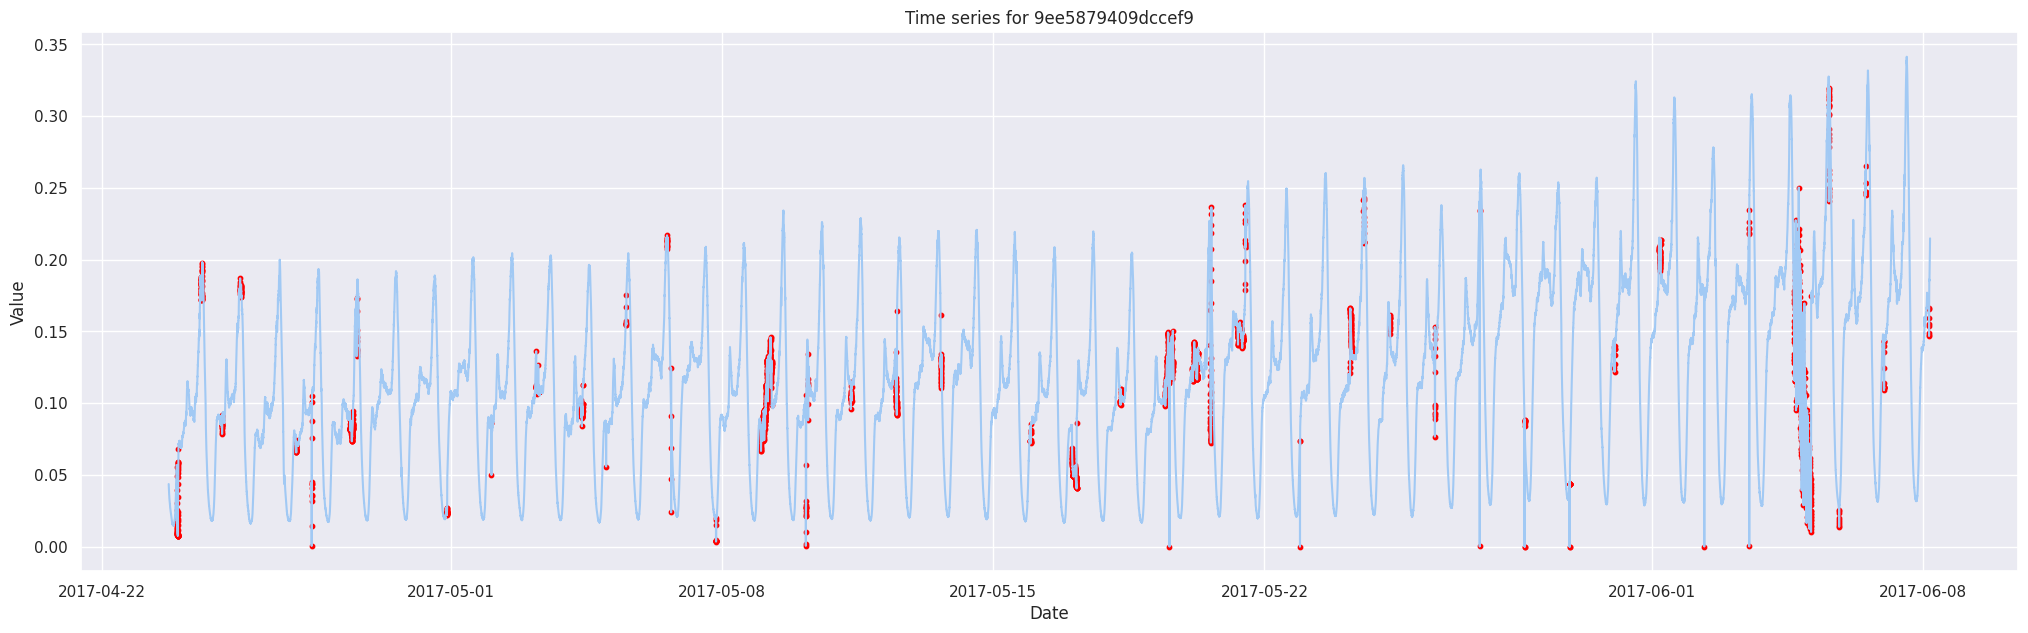

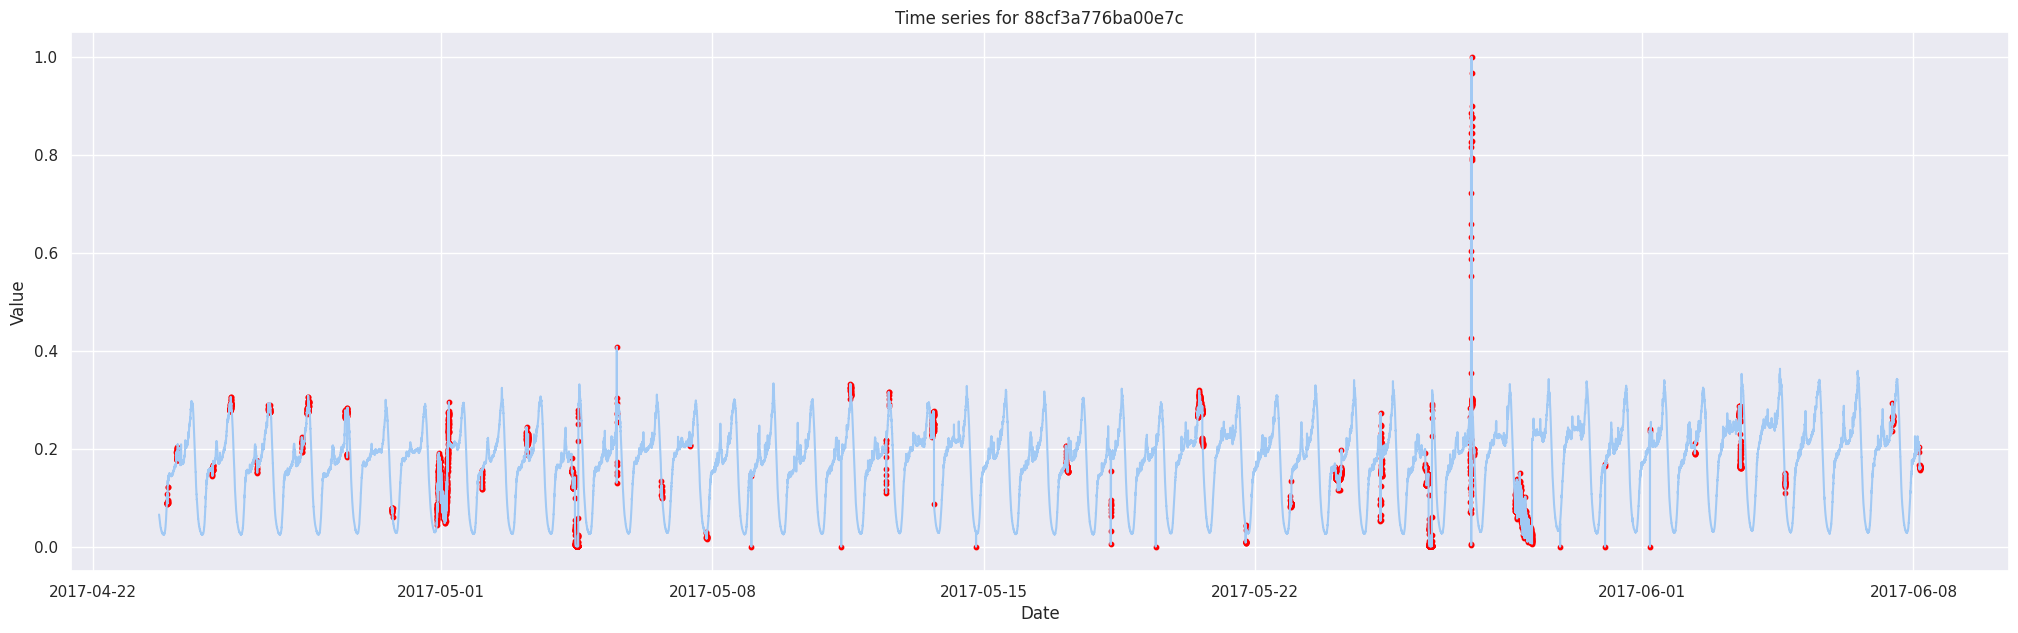

In [12]:
for kpi_id in df['KPI ID'].unique():
    plot_ts_for_kpi(df_prepared,kpi_id)